In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('haberman.csv')

In [4]:
data.shape

(306, 4)

In [5]:
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
data.head(12)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


**Observations**

1--There are no missing values in this data set.

2--All the columns are of the integer data type.

3--The datatype of the status is an integer, it has to be converted to a categorical datatype

4--In the status column, the value 1 can be mapped to ‘yes’ which means the patient has survived 5 years or longer. And the value 2 can be mapped to ‘no’ which means the patient died within 5 years.

In [8]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
data['status'] = data['status'].map({1:'Yes',2:'No'})

In [10]:
data["status"].value_counts()

Yes    225
No      81
Name: status, dtype: int64

**Observations**

1 - 225 patients survived and 81 did not.

2 - Imbalanced Dataset.

**Bi-Variate analysis**

**Scatter Plots**

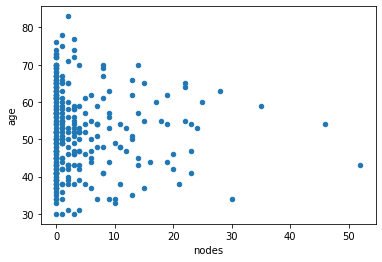

In [11]:
data.plot(kind = 'scatter', x = 'nodes', y= 'age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


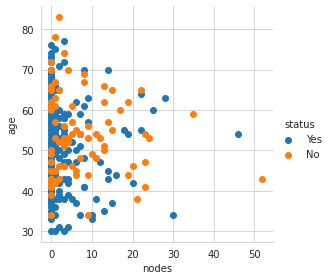

In [12]:
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='status', size = 4)\
    .map(plt.scatter,'nodes','age')\
    .add_legend()
plt.show() 

**Pair Plots**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


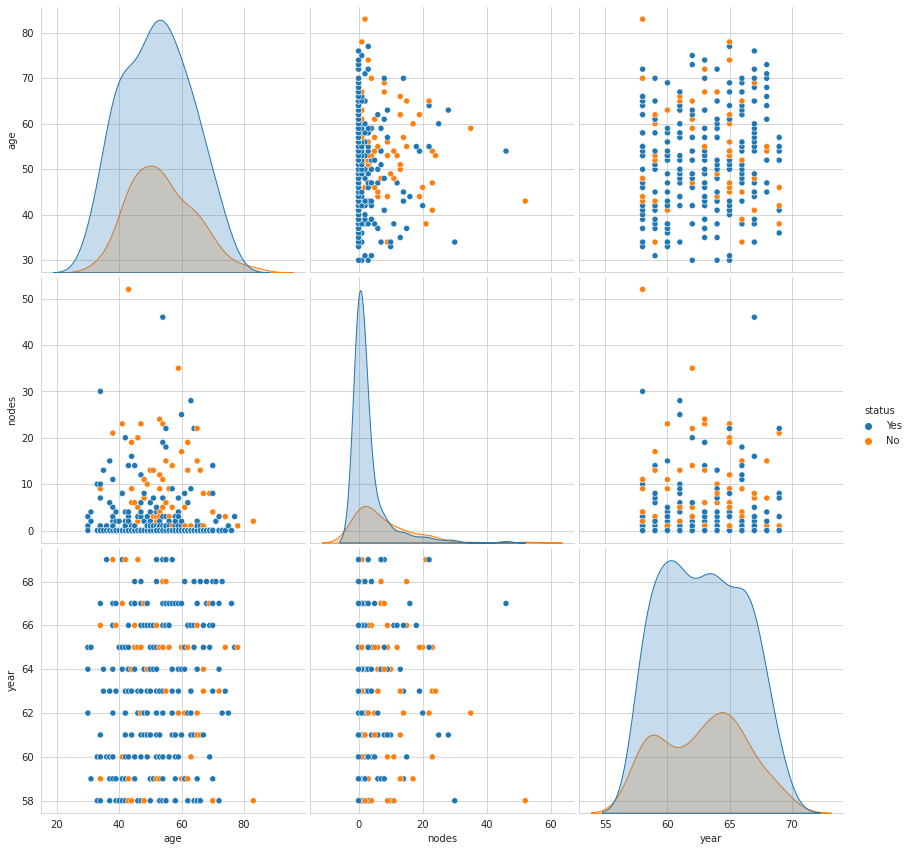

In [13]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(data, hue='status', size= 4, vars = ['age','nodes','year'])
plt.show()

**Probability Density Function(PDF)**

Probability Density Function (PDF) is the probability that the variable takes a value x. (a smoothed version of the histogram)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


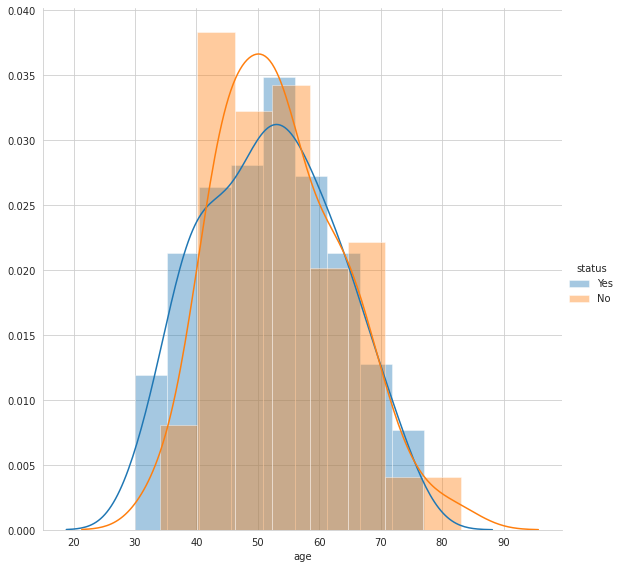

'In belowl plot it is observed that at the age range from 30–75 the status of survival and death is same.\n So, using this datapoint we cannot predict anything'

In [14]:
#PDF of Age

sns.FacetGrid(data, hue = 'status',size =8) \
    .map(sns.distplot,'age') \
    .add_legend();
plt.show()

"""In belowl plot it is observed that at the age range from 30–75 the status of survival and death is same.
 So, using this datapoint we cannot predict anything"""

**Observations**:

1 - Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age.

2 - Although there is overlapping we can vaguely tell that people whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. While people whose age is in the range 60–75 have equal chances of surviving and not surviving.

3 - Yet, this cannot be our final conclusion. We cannot decide the survival chances of a patient just by considering the age parameter

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


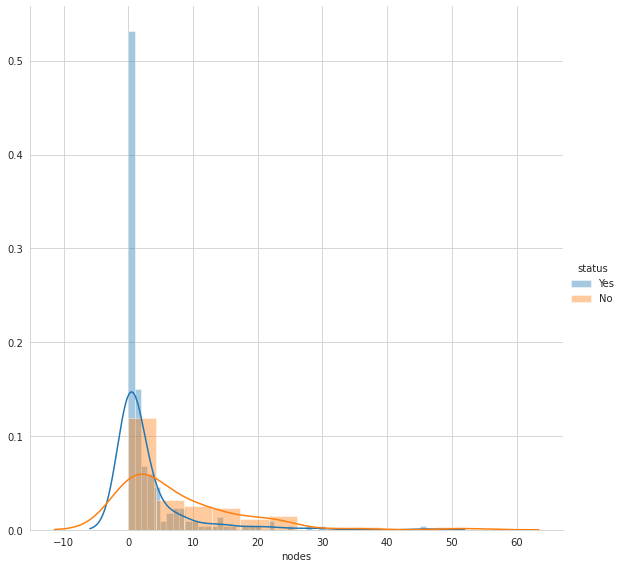

In [15]:
#PDF of nodes
sns.FacetGrid(data, hue = 'status',size =8) \
    .map(sns.distplot,'nodes') \
    .add_legend();
plt.show()

**Observations**:

Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


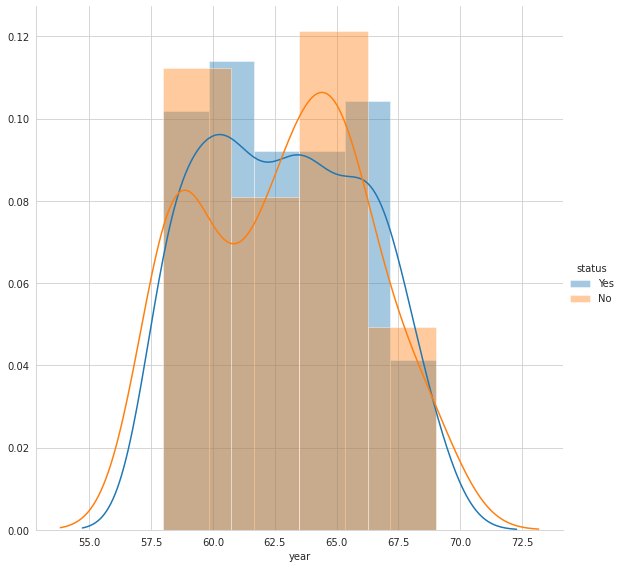

In [16]:
#PDF of Year

sns.FacetGrid(data, hue = 'status',size =8) \
    .map(sns.distplot,'year') \
    .add_legend();
plt.show()

**Observations**:

There is major overlapping observed. This graph only tells how many of the operations were successful and how many weren’t.This cannot be a parameter to decide the patient’s survival chances.

However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.

In [17]:
status_yes = data[data['status'] == 'Yes']
status_yes.describe()
#status_yes will hold all the records where status === Yes

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [18]:
data['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

In [19]:
status_no = data[data['status']=='No']
status_no.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


In [20]:
status_no = data[data['status']=='No']
status_no.describe()
#status_no will hold all the records where status === No

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


**Cumulative Distribution Function(CDF)**

The Cumulative Distribution Function (CDF) is the probability that the variable takes a value less than or equal to x.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
                                           
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


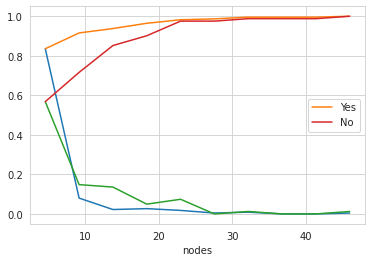

In [21]:
counts1, bin_edges1 = np.histogram(status_yes['nodes'], bins = 10, density = True)
pdf1 = counts1/sum(counts1)
print(pdf1)
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label ='Yes')
plt.xlabel('nodes')
print('                                           ')

counts2, bin_edges2 = np.histogram(status_no['nodes'], bins = 10, density = True)
pdf2 = counts2/sum(counts2)
print(pdf2)
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges1[1:], pdf2)
plt.plot(bin_edges1[1:], cdf2, label ='No')
plt.xlabel('nodes')
plt.legend()
plt.show()

**Observations**

83.55% of the patients who have survived had nodes in the range of 0–4.6

**Box Plots and Violin Plots**

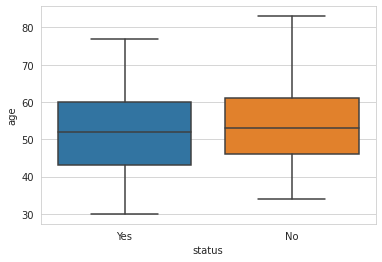

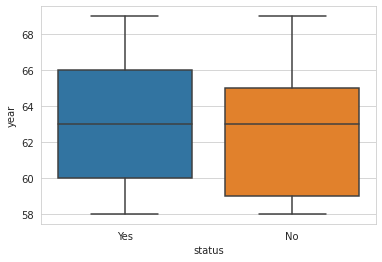

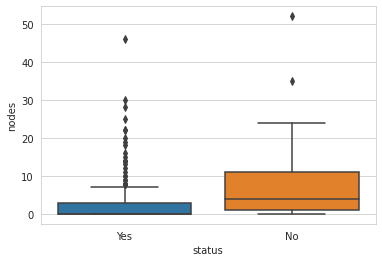

In [22]:
sns.boxplot(x = 'status', y = 'age', data = data)
plt.show()
sns.boxplot(x = 'status', y = 'year',data = data)
plt.show()
sns.boxplot(x = 'status', y = 'nodes',data = data)
plt.show()

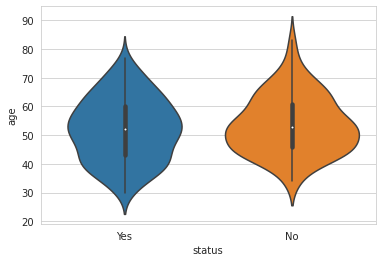

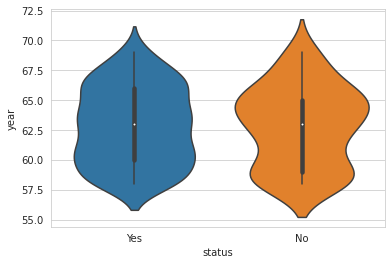

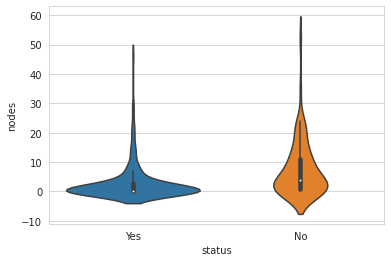

In [23]:
sns.violinplot(x = 'status', y = 'age', data = data,height = 10)
plt.show()
sns.violinplot(x = 'status', y = 'year',data = data, height = 10)
plt.show()
sns.violinplot(x = 'status', y = 'nodes',data = data, height = 10)
plt.show()

**Observations**:

Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances.

A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.

There were comparatively more people who got operated in the year 1965 did not survive for more than 5 years.
There were comparatively more people in the age group 45 to 65 who did not survive. Patient age alone is not an important parameter in determining the survival of a patient.

The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

**Multivariate analysis**

Contour Plot

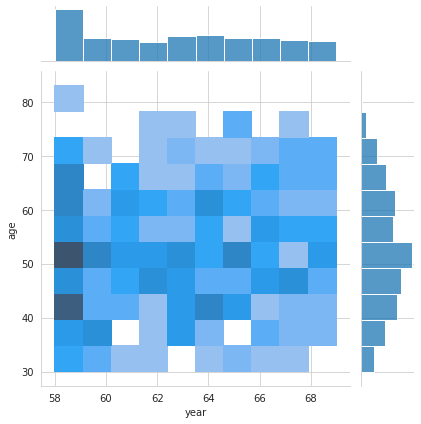

In [34]:
sns.jointplot(x = 'year', y  = 'age', data = data,kind = 'hist')
plt.show()

**Observation:**

From 1960 to 1964, more operations done on the patients in the age group 45 to 55.

Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.

Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.

The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.